In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!unzip starbucks.zip

Archive:  starbucks.zip
  inflating: reviews_data.csv        


In [65]:
# Lendo o dataframe
df = pd.read_csv('reviews_data.csv')

In [66]:
#Removendo as linhas que tenham NaN na coluna 'Rating'. Total de 145 linhas removidas
df.dropna(subset=['Rating'], inplace=True)
df.dropna(subset=['Review'], inplace=True)

In [67]:
df.rename(columns={'Rating': 'Score'}, inplace=True)

In [68]:
# Alterando os valores da coluna Rating, 1 e 2 para 'ruim', 3 para 'medio' e 4 e 5 para 'bom'
df['Rating'] = df['Score'].replace({1: 'ruim', 2: 'ruim', 3: 'medio', 4:'bom', 5:'bom'})

In [ ]:
df

,name,location,Date,Score,Review,Image_Links,Rating
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],bom
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],bom
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,bom
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],bom
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,bom
...,...,...,...,...,...,...,...
700,Margaret,"Cotati, CA","Reviewed Oct. 2, 2011",1.0,I ordered Via Starbucks coffee online. I recei...,['No Images'],ruim
701,Ric,"Oakville, ON","Reviewed Aug. 31, 2011",3.0,"My name is Ric **, I am journalist by professi...",['No Images'],medio
702,Jayne,"Ny, NY","Reviewed Aug. 24, 2011",1.0,"The bagel was ice cold, not cut and not toasted.",['No Images'],ruim
703,Norma,"La Puente, CA","Reviewed Aug. 15, 2011",1.0,"In the morning of Monday, August 15, 2011, at ...",['No Images'],ruim


In [69]:
df_ruim = df[df['Rating'] == 'ruim']
df_medio = df[df['Rating'] == 'medio']
df_bom = df[df['Rating'] == 'bom']



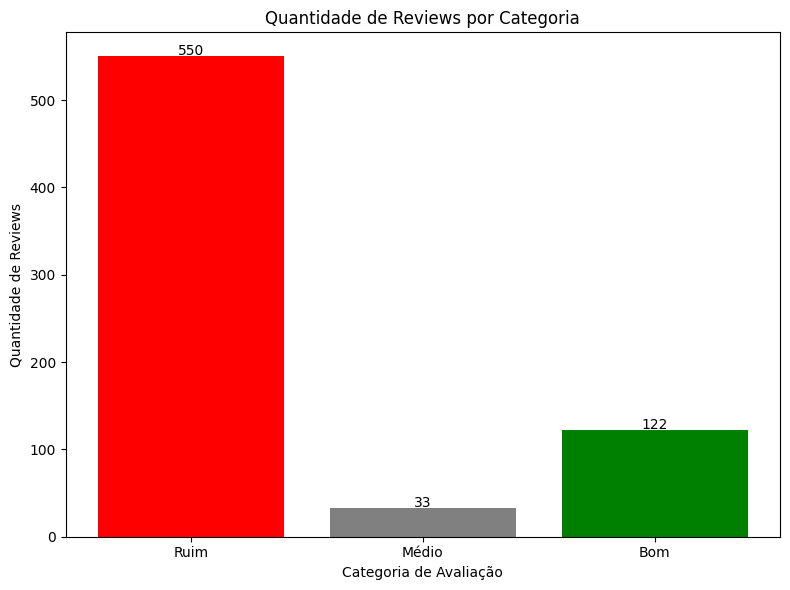

In [70]:

# Contar o número de reviews em cada categoria
num_ruim = df_ruim['Rating'].count()
num_medio = df_medio['Rating'].count()
num_bom = df_bom['Rating'].count()

# Categorias de avaliação
categorias = ['Ruim', 'Médio', 'Bom']

# Contagem de avaliações para cada categoria
contagens = [num_ruim, num_medio, num_bom]

plt.figure(figsize=(8, 6))
plt.bar(categorias, contagens, color=['red', 'gray', 'green'])

plt.title('Quantidade de Reviews por Categoria')
plt.xlabel('Categoria de Avaliação')
plt.ylabel('Quantidade de Reviews')

for i, count in enumerate(contagens):
    plt.text(i, count + 1, str(count), ha='center')

# Exibir o gráfico
plt.tight_layout()
plt.show()


Notoriamente há mais avaliações negativas do que positivas. Isso pode ser teoricamente explicado pelo viés da negatividade que diz que experiências negativas muitas vezes têm um impacto mais forte e duradouro do que as positivas. As pessoas tendem a se lembrar e dar mais importância a eventos ou experiências negativas do que positivas. Isso pode se refletir em avaliações e comentários.

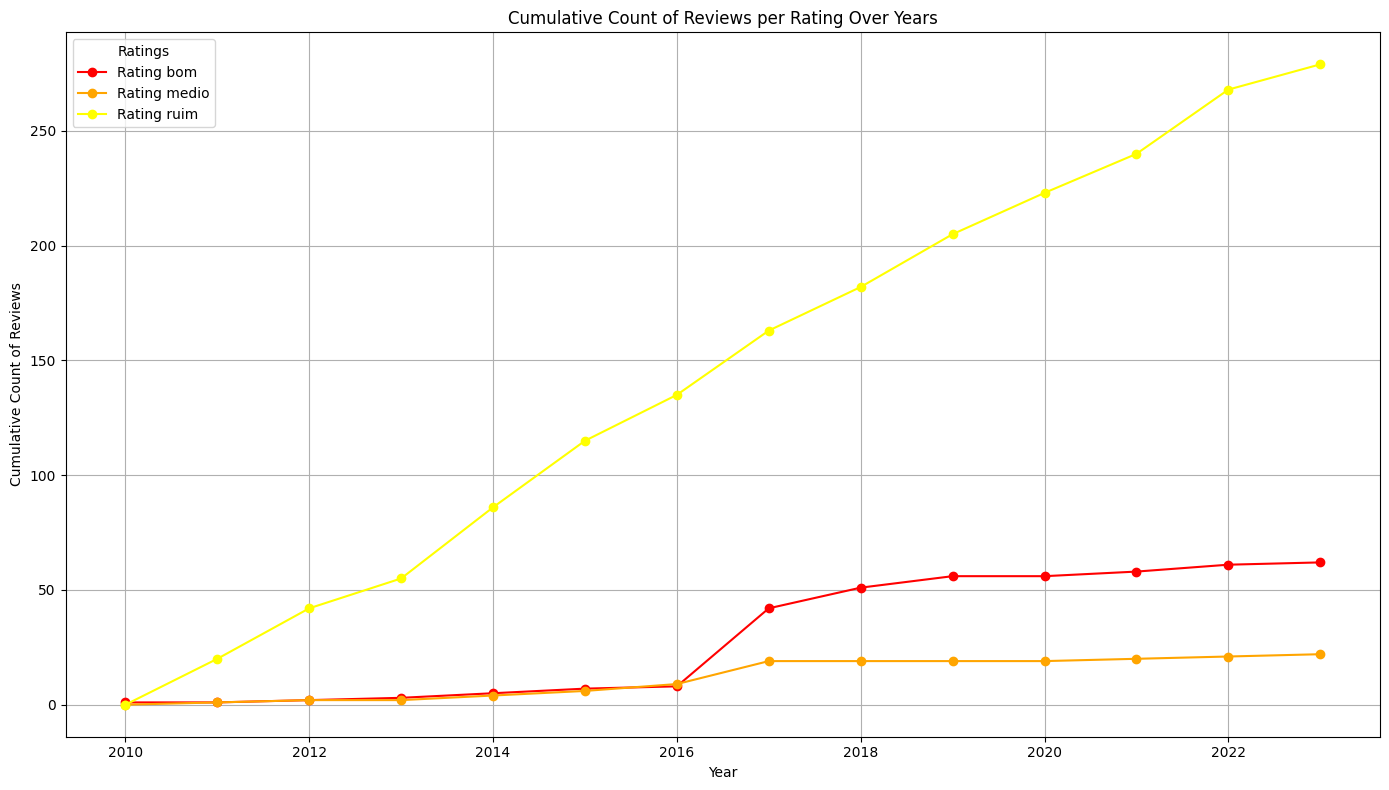

In [72]:
# Convertendo a coluna 'Date' para o formato datetime
df['Date_modified'] = pd.to_datetime(df['Date'], errors='coerce', format='Reviewed %b. %d, %Y')

# Criando uma nova coluna 'Year' para armazenar o ano da avaliação
df['Year'] = df['Date_modified'].dt.year

# Agrupando os dados por 'Year' e 'Rating' para obter a contagem de avaliações para cada classificação por ano
review_counts = df.groupby(['Year', 'Rating']).size().unstack(fill_value=0)
colors = ['red', 'orange', 'yellow', 'green', 'blue']

plt.figure(figsize=(14, 8))

# Plotando o gráfico de linhas usando a soma cumulativa das contagens de avaliações
for rating, color in zip(review_counts.columns, colors):
    plt.plot(review_counts.index, review_counts[rating].cumsum(), marker='o', label=f'Rating {rating}', color=color)

plt.title('Cumulative Count of Reviews per Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Count of Reviews')
plt.grid(True)
plt.legend(title='Ratings')
plt.tight_layout()

plt.show()

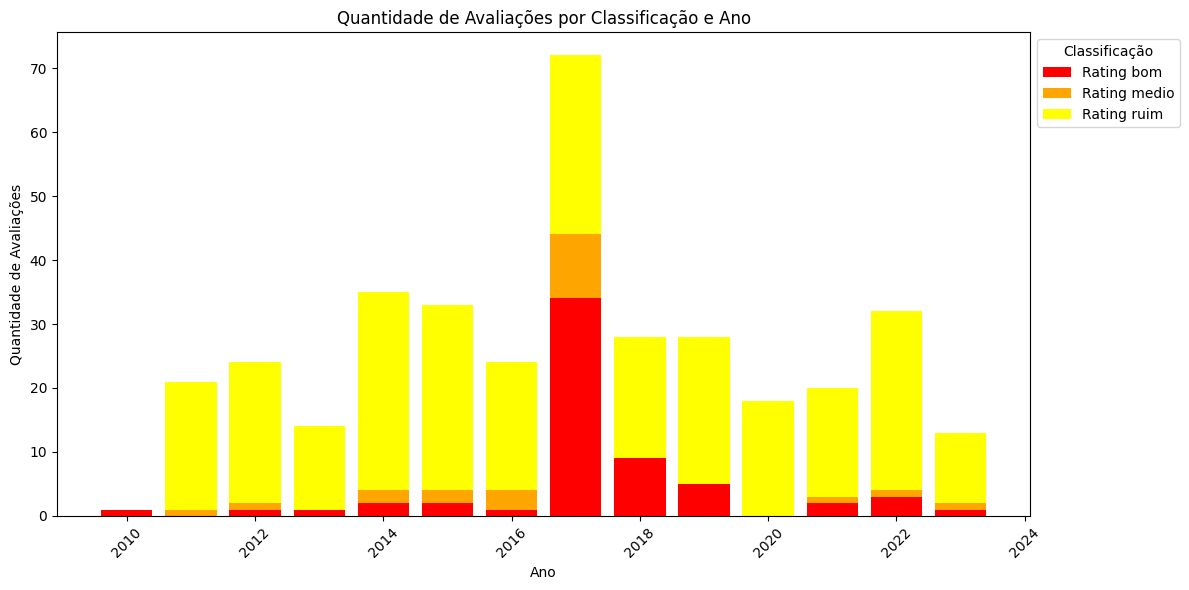

In [73]:
colors = ['red', 'orange', 'yellow', 'green', 'blue']

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
bottom = [0] * len(review_counts.index)

for rating, color in zip(review_counts.columns, colors):
    plt.bar(review_counts.index, review_counts[rating], bottom=bottom, label=f'Rating {rating}', color=color)
    bottom = [sum(x) for x in zip(bottom, review_counts[rating])]

plt.title('Quantidade de Avaliações por Classificação e Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Avaliações')
plt.legend(title='Classificação', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [74]:
# Baixando a biblioteca nltk junto com as stopwords e nuvens de palavras
import nltk
from nltk.corpus import stopwords
import pandas as pd
import nltk
from nltk.util import trigrams, bigrams
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
def create_trigrams(dataframe, trigramas_personalizados):
    # Concatenar todas as avaliações em uma única string e converter para minúsculas
    text = ' '.join(dataframe['Review']).lower()

    # Tokenizar as palavras
    tokens = word_tokenize(text)

    # Remover as stopwords
    stopwords_nltk = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords_nltk]

    # Gerar trigramas
    tri_tokens = list(trigrams(tokens))

    # Filtrar trigramas personalizados
    tri_tokens = [trigrama for trigrama in tri_tokens if trigrama not in trigramas_personalizados]

    # Contar a frequência dos trigramas
    tri_freq = FreqDist(tri_tokens)

    return tri_freq

In [76]:
#remover os trigramas personalizados
trigramas_personalizados = {('i', 'don', 't'), ('i', 'am', 'not'), ('i', 'do', 'not'), ('i', 'have', 'been'),
                            ('i', 'had', 'been'), ('i', 'will', 'be'), ('i', 'would', 'be'), ('i', 'was', 'going'),
                            ('i', 'went', 'to'), ('i', 'used', 'to'), ('it', 'was', 'a'), ('there', 'was', 'a'),
                            ('this', 'is', 'a'), ('i', 'think', 'that'), ('i', 'thought', 'that'),('every', 'time', 'go'),('called', 'starbucks', 'customer')},

In [77]:
#avaliações ruins
trigrams_ruim = create_trigrams(df_ruim, trigramas_personalizados)
#avaliações medianas
trigrams_medio = create_trigrams(df_medio, trigramas_personalizados)
#avaliações boas
trigrams_bom = create_trigrams(df_bom, trigramas_personalizados)

In [78]:
# top 10 trigramas das avaliações ruins
most_common_trigrams_ruim = trigrams_ruim.most_common(10)

In [79]:
# top 10 trigramas das avaliações boas
most_common_trigrams_bom = trigrams_bom.most_common(10)

In [80]:
print(most_common_trigrams_ruim)

[(('starbucks', 'customer', 'service'), 16), (('worst', 'customer', 'service'), 11), (('starbucks', 'gift', 'card'), 7), (('called', 'customer', 'service'), 7), (('customer', 'service', 'told'), 6), (('bad', 'customer', 'service'), 6), (('every', 'time', 'go'), 4), (('long', 'time', 'customer'), 4), (('gold', 'card', 'member'), 4), (('called', 'starbucks', 'customer'), 4)]


In [81]:
print(most_common_trigrams_bom)

[(('great', 'customer', 'service'), 4), (('customer', 'service', 'staff'), 3), (('coffee', 'second', 'none'), 3), (('get', 'order', 'right'), 2), (('best', 'customer', 'service'), 2), (('would', 'like', 'give'), 2), (('appreciate', 'hard', 'work'), 2), (('many', 'starbucks', 'locations'), 2), (('pumpkin', 'cream', 'cold'), 2), (('cream', 'cold', 'brew'), 2)]


In [82]:
#função para entender o contexto das avaliações
def find_reviews_containing_trigram(dataframe, trigrama):
    # Criar uma lista para armazenar as avaliações
    reviews_containing_trigram = []

    # Iterar sobre as avaliações no dataframe
    for review in dataframe['Review']:
        # Tokenizar a avaliação
        tokens = word_tokenize(review.lower())
        # Criar trigramas para a avaliação
        review_trigrams = list(trigrams(tokens))
        # Verificar se o trigrama desejado está na avaliação
        if trigrama in review_trigrams:
            reviews_containing_trigram.append(review)

    return reviews_containing_trigram

In [83]:
selected_trigrama = ('starbucks', 'customer', 'service')


In [84]:
reviews_with_trigrama = find_reviews_containing_trigram(df_ruim, selected_trigrama)


In [85]:
reviews_with_trigrama

["I have been purchasing Starbucks a lot using my cash app card. I reached out to Starbucks customer service so they could add my purchases or receipts to my account for points. I emailed them and received an automated email back saying someone will reach out to me. No one has as of yet. I sent out another email and still didn't get any assistance. Starbucks is ignoring me about receiving help",
 'I spend about $30/day, is it asking too much to have a lid that does not fall off? I have contacted Starbucks customer service for months being told they are addressing the issue but nothing changes.',
 'I contacted Starbucks customer service to ask why they only give one day to redeem their free drink for the birthday promotion. I wasn\'t able to use the free drink promotion on the one day allowed. I\'ve been a customer for over 11 years and all they stated was, "Sorry, our policy has changed, have a nice day". I then contacted customer service online again to see how to cancel my membership

In [86]:
stopwords_english = set(stopwords.words('english'))

# Definir uma lista de bigramas para excluir
excluir_bigramas = set([
    ('in', 'the'), ('for', 'the'), ('of', 'the'),
    ('to', 'the'), ('on', 'the'), ('with', 'the'),
    ('at', 'the'), ('by', 'the'), ('from', 'the'),
    ('i', 'was'), ('i', 'am'), ('i', 'have'),
    ('i', 'will'), ('i', 'would'), ('i', 'can'),
    ('i', 'could'), ('it', 'is'), ('they', 'are'),
    ('you', 'are'), ('we', 'are'), ('that', 'is'),
    ('went', 'starbucks'), ('go', 'starbucks'),('starbucks', 'customer'),('every', 'time'),('called', 'starbucks'),('go', 'back')
    # Adicione mais bigramas conforme necessário
])
#criar bigramas para entender melhor o contexto das avaliações
def create_filtered_bigrams(dataframe):
    # Concatenar todas as avaliações em uma única string e converter para minúsculas
    text = ' '.join(dataframe['Review']).lower()

    # Tokenizar as palavras
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Remover stopwords
    tokens = [token for token in tokens if token not in stopwords_english]

    # Criar e filtrar bigramas
    bigrams_filtered = [pair for pair in bigrams(tokens) if pair not in excluir_bigramas]

    # Contar a frequência dos bigramas filtrados
    bigrams_frequency = FreqDist(bigrams_filtered)

    return bigrams_frequency

In [87]:
filtered_bigrams_ruim = create_filtered_bigrams(df_ruim)
print(filtered_bigrams_ruim.most_common(10))

[(('customer', 'service'), 109), (('drive', 'thru'), 35), (('gift', 'card'), 29), (('first', 'time'), 22), (('starbucks', 'card'), 21), (('cup', 'coffee'), 19), (('caramel', 'macchiato'), 16), (('gold', 'card'), 16), (('coffee', 'starbucks'), 15), (('coffee', 'shop'), 15)]


In [88]:
filtered_bigrams_bom = create_filtered_bigrams(df_bom)
print(filtered_bigrams_bom.most_common(10))

[(('customer', 'service'), 27), (('great', 'coffee'), 6), (('food', 'items'), 5), (('always', 'get'), 4), (('great', 'customer'), 4), (('store', 'manager'), 4), (('great', 'job'), 4), (('great', 'experience'), 4), (('quality', 'service'), 4), (('could', 'use'), 4)]


In [89]:
def find_reviews_containing_bigram(dataframe, bigram):
    # Criar uma lista para armazenar as avaliações
    reviews_containing_bigram = []

    # Iterar sobre as avaliações no dataframe
    for review in dataframe['Review']:
        # Tokenizar a avaliação
        tokens = word_tokenize(review.lower())
        # Criar bigramas para a avaliação
        review_bigrams = list(bigrams(tokens))
        # Verificar se o bigrama desejado está na avaliação
        if bigram in review_bigrams:
            reviews_containing_bigram.append(review)

    return reviews_containing_bigram

In [90]:
select_bigram = ('customer', 'service')

In [91]:
reviews_with_bigram = find_reviews_containing_bigram(df_ruim, select_bigram)
for review in reviews_with_bigram:
    print(review)

I filed a BBB complaint last month because Starbucks canceled my Starbucks Reward cards. I couldn't remember the balances, so I guessed about $9. Starbucks played nothing but games and tried everything they could to avoid responding to the complaint. I received a couple of phone call messages asking me to contact them directly and discuss the matter. The number provided was the customer service number and when I spoke with one representative, Linda hung up the phone on me. I did not use my card since 2012 which is my prerogative. Because of this and other reasons, Starbucks decided to close my Starbucks account. I reopened one about a few weeks ago and added a new card that I have not used yet.
Insulted by customer service representative as I called to complain instead of acknowledge they have issues and they are providing low quality. She called me suspicious even though I spend at least average 15 dollars a day. Was so upset and I decided to close the account after being with them fo

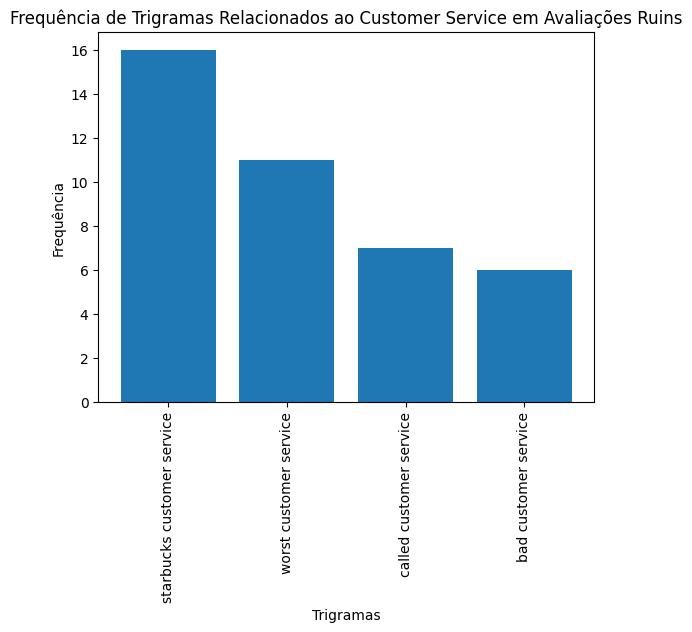

In [92]:
import matplotlib.pyplot as plt


trigramas_customer_service = {
    'starbucks customer service': 16,
    'worst customer service': 11,
    'called customer service': 7,
    'bad customer service': 6,
}

labels, counts = zip(*trigramas_customer_service.items())

plt.bar(labels, counts)

plt.title('Frequência de Trigramas Relacionados ao Customer Service em Avaliações Ruins')
plt.xlabel('Trigramas')
plt.ylabel('Frequência')
plt.xticks(rotation=90)  # Rotacionar as etiquetas do eixo x para melhor leitura

plt.show()

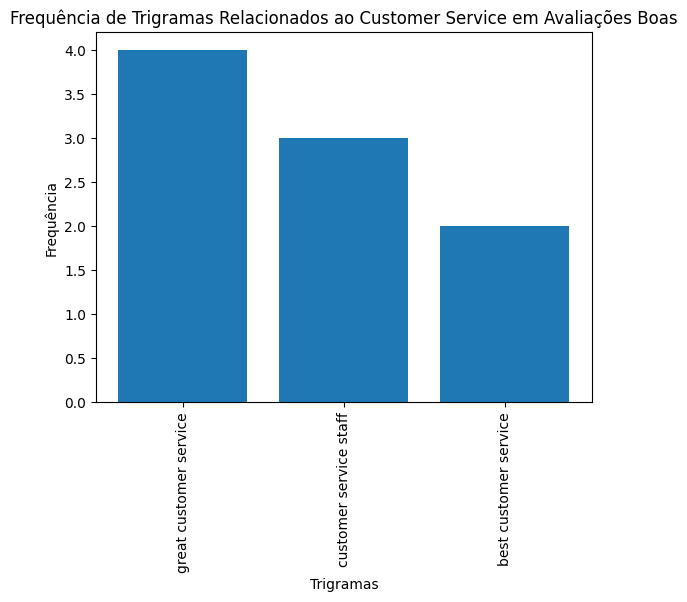

In [93]:

trigramas_customer_service = {
    'great customer service': 4,
    'customer service staff': 3,
    'best customer service': 2,
}

labels, counts = zip(*trigramas_customer_service.items())

plt.bar(labels, counts)

plt.title('Frequência de Trigramas Relacionados ao Customer Service em Avaliações Boas')
plt.xlabel('Trigramas')
plt.ylabel('Frequência')
plt.xticks(rotation=90)  # Rotacionar as etiquetas do eixo x para melhor leitura

plt.show()

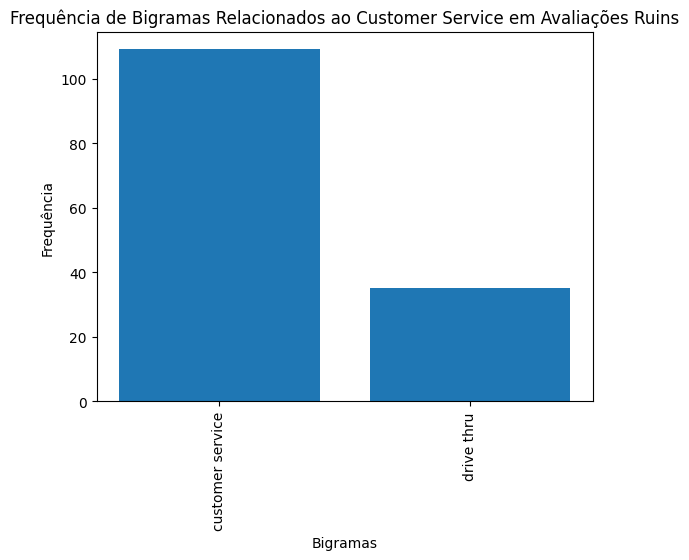

In [94]:
import matplotlib.pyplot as plt


bigrams_customer_service = {
    'customer service': 109,
    'drive thru': 35,
}

labels, counts = zip(*bigrams_customer_service.items())

plt.bar(labels, counts)

plt.title('Frequência de Bigramas Relacionados ao Customer Service em Avaliações Ruins')
plt.xlabel('Bigramas')
plt.ylabel('Frequência')
plt.xticks(rotation=90)

plt.show()

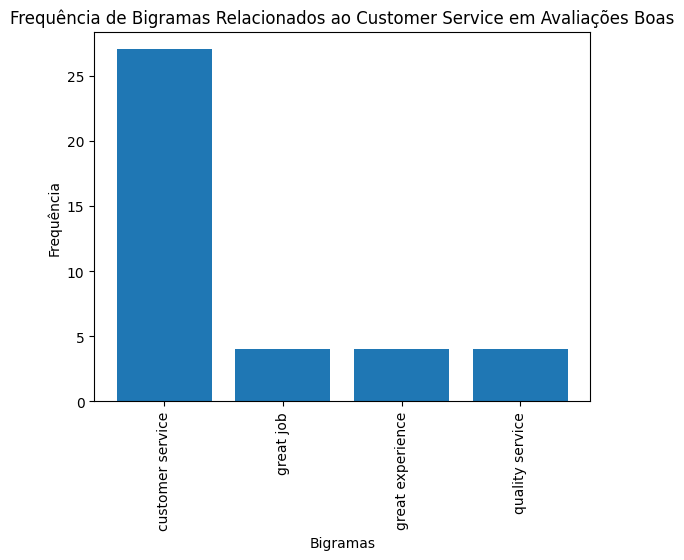

In [95]:

bigrams_customer_service = {
    'customer service' : 27,
    'great job' : 4,
    'great experience':4,
    'quality service' : 4,

}

labels, counts = zip(*bigrams_customer_service.items())

plt.bar(labels, counts)

plt.title('Frequência de Bigramas Relacionados ao Customer Service em Avaliações Boas')
plt.xlabel('Bigramas')
plt.ylabel('Frequência')
plt.xticks(rotation=90)

plt.show()

In [96]:
print(filtered_bigrams_bom.most_common(10))

[(('customer', 'service'), 27), (('great', 'coffee'), 6), (('food', 'items'), 5), (('always', 'get'), 4), (('great', 'customer'), 4), (('store', 'manager'), 4), (('great', 'job'), 4), (('great', 'experience'), 4), (('quality', 'service'), 4), (('could', 'use'), 4)]


In [97]:

# Filtrar avaliações ruins que mencionam "customer service"
df_ruim_customer_service = df_ruim[df_ruim['Review'].str.contains("customer service", case=False)]

# Agrupar pelo local e contar o número de avaliações ruins
df_ruim_location_count = df_ruim_customer_service.groupby('location')['Review'].count().reset_index()

# Ordenar os valores para melhor visualização
df_ruim_location_count = df_ruim_location_count.sort_values('Review', ascending=False)



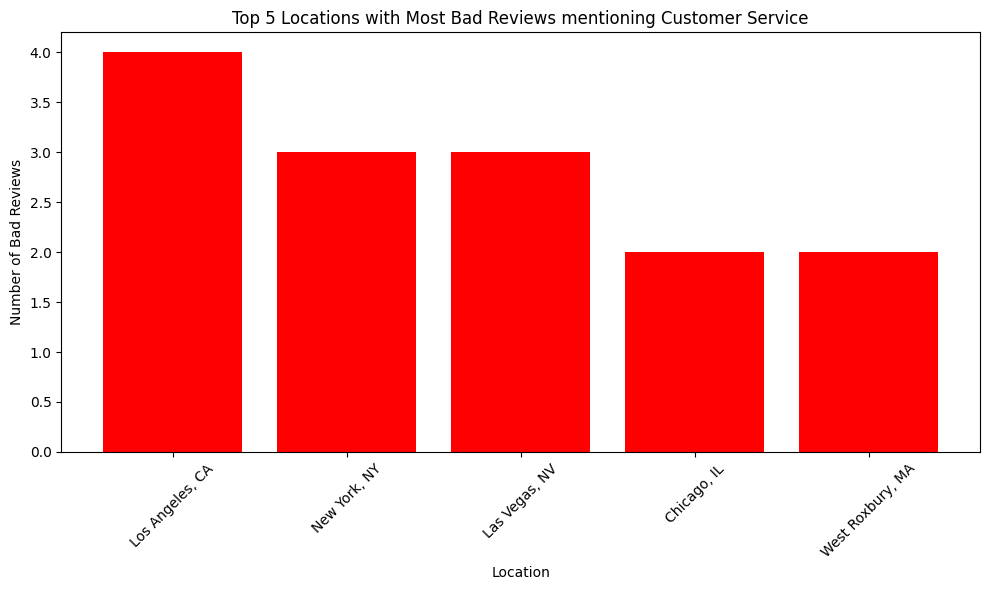

In [98]:
top_locations = df_ruim_location_count.sort_values('Review', ascending=False).head(5)

# Criar um novo gráfico de barras com apenas os top 5
plt.figure(figsize=(10, 6))
plt.bar(top_locations['location'], top_locations['Review'], color='red')
plt.xlabel('Location')
plt.ylabel('Number of Bad Reviews')
plt.title('Top 5 Locations with Most Bad Reviews mentioning Customer Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

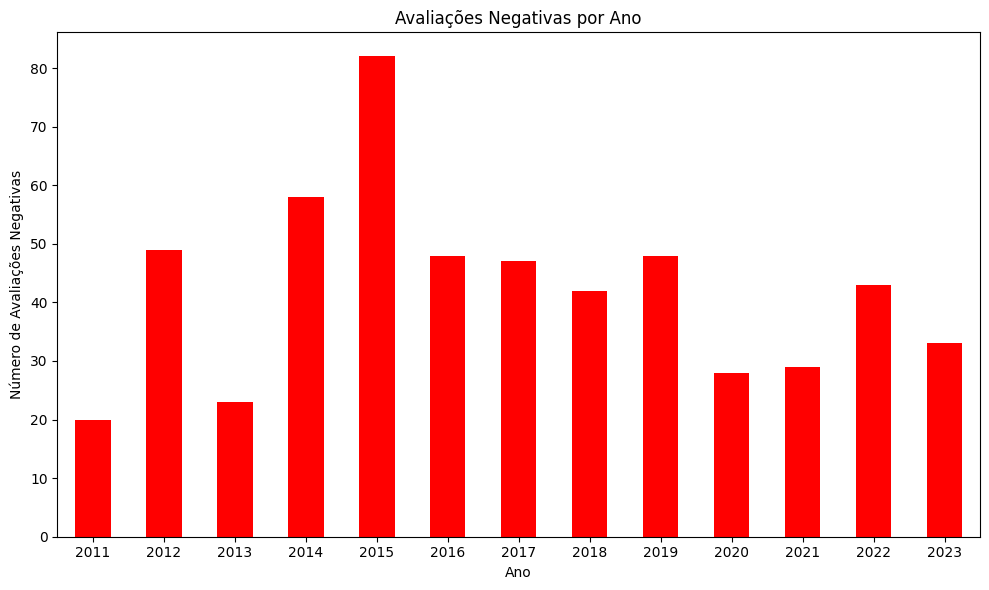

In [100]:


# Extrai apenas o ano da coluna 'Date'
df['Date'] = df['Date'].astype(str)
df['Year'] = df['Date'].str.extract(r'(\d{4})')

df['Year'] = df['Year'].astype(int)

#Filtrando para conter apenas avaliações ruins
df_ruim = df[df['Rating'] == 'ruim']

# Agrupar por ano e contar o número de avaliações ruins
df_ruim_yearly = df_ruim.groupby('Year')['Review'].count()

plt.figure(figsize=(10, 6))
df_ruim_yearly.plot(kind='bar', color='red')
plt.title('Avaliações Negativas por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Avaliações Negativas')
plt.xticks(rotation=0)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de labels
plt.show()


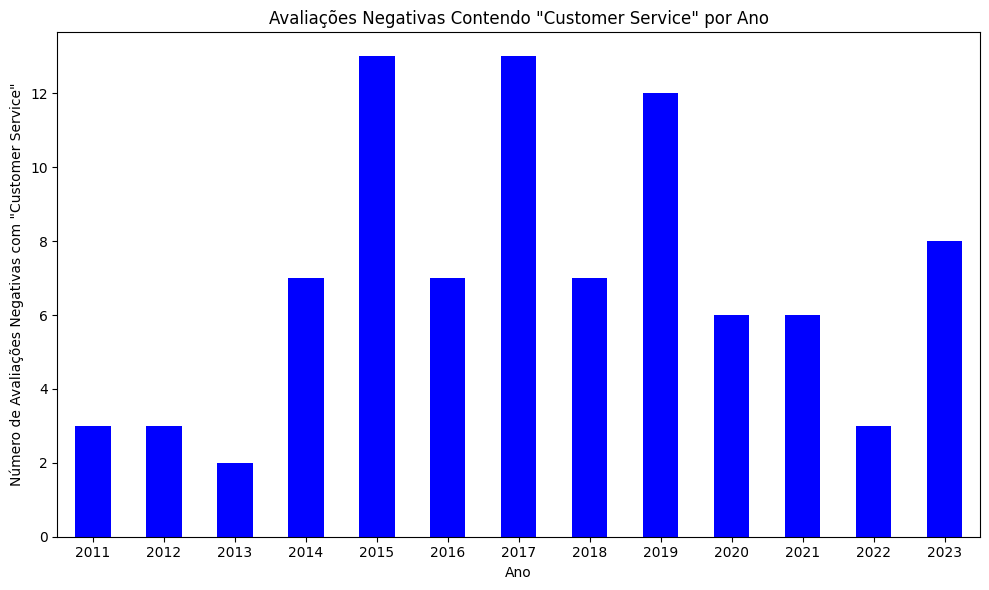

In [ ]:
# Filtrar as avaliações que contêm o bigrama "customer service"
df['Contains_Customer_Service'] = df['Review'].str.contains('customer service', case=False, na=False)
df_ruim_customer_service = df[(df['Rating'] == 'ruim') & (df['Contains_Customer_Service'])]

# Agrupar por ano e contar o número de avaliações ruins que contêm "customer service"
df_ruim_customer_service_yearly = df_ruim_customer_service.groupby('Year')['Review'].count()

plt.figure(figsize=(10, 6))
df_ruim_customer_service_yearly.plot(kind='bar', color='blue')
plt.title('Avaliações Negativas Contendo "Customer Service" por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Avaliações Negativas com "Customer Service"')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


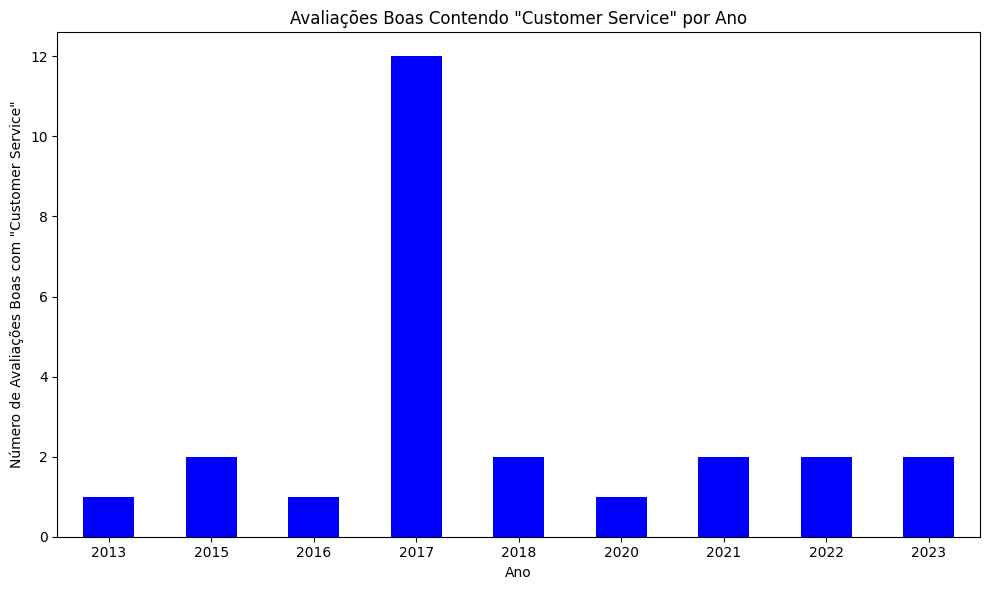

In [104]:
df['Contains_Customer_Service'] = df['Review'].str.contains('customer service', case=False, na=False)
df_bom_customer_service = df[(df['Rating'] == 'bom') & (df['Contains_Customer_Service'])]

# Agrupar por ano e contar o número de avaliações boas que contêm "customer service"
df_bom_customer_service_yearly = df_bom_customer_service.groupby('Year')['Review'].count()

plt.figure(figsize=(10, 6))
df_bom_customer_service_yearly.plot(kind='bar', color='blue')
plt.title('Avaliações Boas Contendo "Customer Service" por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Avaliações Boas com "Customer Service"')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Conclusão
Esta análise ressalta a importância crítica do atendimento ao cliente para a experiência em lojas Starbucks. Os resultados sugerem que os consumidores valorizam fortemente as interações positivas com os funcionários e que essas experiências podem tanto elevar a percepção da marca quanto causar um impacto negativo duradouro. A Starbucks, e de fato qualquer empresa focada no serviço ao consumidor, pode tirar lições valiosas desses insights para treinar e incentivar um atendimento excepcional.


